In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# import lasso and elastic net models
from sklearn.linear_model import Lasso, ElasticNet
import sys
sys.path.append('../utilities/')
from MF import *

%matplotlib inline


In [2]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import normalized_mutual_info_score as NMI

In [3]:
import sys
sys.path.insert(1, "../utilities")
from plot_utils import *
from extract import *
from assigners import *
from effect_estimators import *
#from experimental import *

In [4]:
def get_ids(data):
    ID=[]
    for line in data.iloc[2,8:]:
        ID.append(line.split('_')[-1].split('.')[0])
    return np.array(ID)

def add_noise(x, magnitude):
    return x + np.random.normal(0,magnitude, x.shape)

### Celldata

In [5]:
fnum=6
pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PARKINSONS/PDproj/cellresults/ttest/withGF/only32/ALPHA0.05FC1.0MINVAR0.125/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

fname = filenames_s2[fnum]

mediumhilicnegGFstatus.csv
mediumhilicnegALPHA0.05FC1.0MINVAR0.125.csv


In [6]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True,[0,1,2])

Area = data_significant.iloc[3:,8:48]
groups = data.iloc[0,8:48]
labels = LabelEncoder().fit_transform(groups)

### Plasmadata

In [1694]:
fnum=1
pathGF = "../../../PARKINSONS/PDproj/plasmadata/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PARKINSONS/PDproj/plasmaresults/ttest/mv_32/pori0.05_FC0.5/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

fname = filenames_s2[fnum]

plasmaHILICposGFstatus_log2.csv
plasmaHILICposGFstatus_pori_var0.06FC0.5.csv


In [1695]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True,[0,1,2,3], ' ')

Area = data_significant.iloc[4:,8:80]
groups = data.iloc[1,8:80]
gender = data.iloc[0,8:80]
labels = LabelEncoder().fit_transform(groups)

### Analysis

In [7]:
sorted_ind=np.argsort(data_significant.iloc[3:,5])
data_significant.iloc[sorted_ind+3,:].head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
85,NaN,C18 H18 N6 O S,-3.43,366.12502,365.11775,0.452,No MS2,[M-H]-1,12.723767178461241,13.056708235084184,...,0,0,0,0,0,0,0,0,0,0
84,NaN,C18 H18 N6 O S,-3.52,366.12499,365.11771,0.658,DDA for preferred ion,[M-H]-1,12.982792320148485,14.041865762942335,...,0,0,0,0,0,0,0,0,0,0
49,4-Acetamidosalicylic Acid,C9 H9 N O4,-2.32,195.05271,194.04543,0.692,DDA for preferred ion,[M-H]-1,12.541100284807511,12.350928291047344,...,32,32,32,32,32,32,32,32,32,32
36,"1H-Indole-2,3,4-triol",C8 H7 N O3,-4.74,165.04181,164.03453,0.742,DDA for preferred ion,[M-H]-1,12.646625480596526,13.205446570480833,...,32,8,8,32,128,8,128,8,8,32
48,"2,3-DIHYDRO-2-METHYL-1,5-BENZOTHIAZEPIN-4(5H)-ONE",C10 H11 N O S,-2.76,193.0556,192.04833,0.819,DDA for preferred ion,[M-H]-1,12.938514221809946,12.82406641393782,...,128,0,0,128,0,128,0,0,128,128


In [8]:
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
rtime=data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)
mass=data_significant.iloc[sorted_ind+3,4].to_numpy(dtype=float)

In [371]:
Y=pd.get_dummies(groups)

In [155]:
pls=PLSRegression(n_components=2).fit(X, Y)
xhat, yhat=pls.transform(X,Y)
y_pred=pls.predict(X)

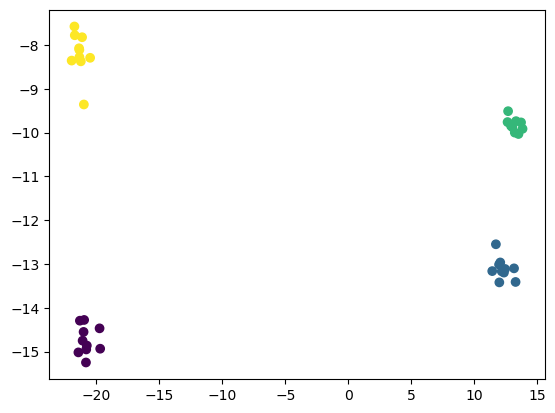

In [168]:
plt.scatter(xhat[:,0],xhat[:,1], c=labels)

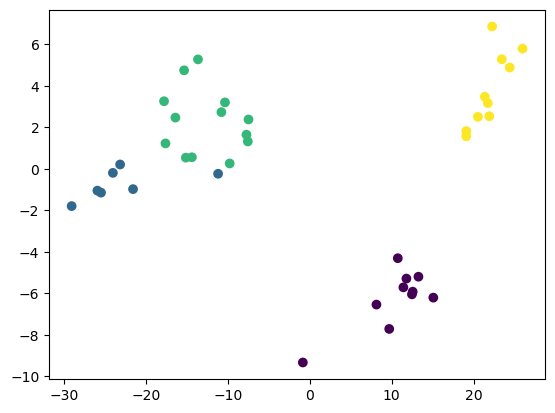

In [157]:
plt.scatter(xhat[:,0],xhat[:,1], c=np.argmax(y_pred, axis=1))

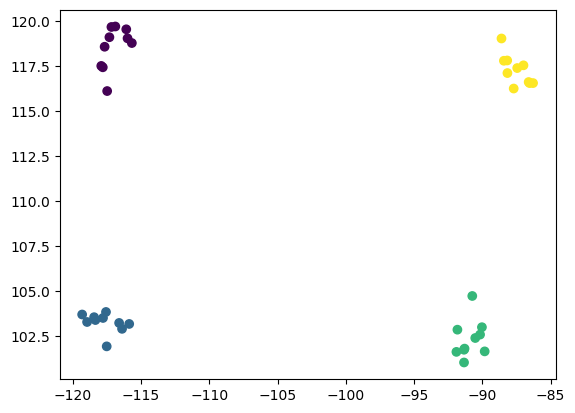

In [1879]:
lda=LinearDiscriminantAnalysis(n_components=3, shrinkage=0.1, solver='eigen').fit(X,labels)
xhat = lda.transform(X)
yhat = lda.predict(X)
plt.scatter(xhat[:,0],xhat[:,1], c=labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


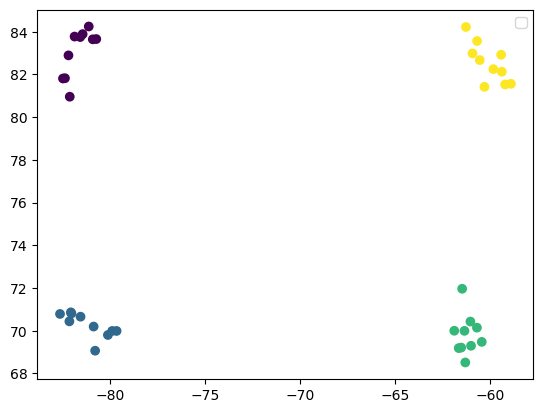

In [1906]:
lda=LinearDiscriminantAnalysis(n_components=3, shrinkage=0.5, solver='eigen').fit(X,labels)
xhat = lda.transform(X)
yhat = lda.predict(X)
plt.scatter(xhat[:,0],xhat[:,1], c=yhat)

From https://hastie.su.domains/Papers/pda.pdf

In [1881]:
delta = .3
Omega = np.eye(X.shape[1]) * delta
N = X.shape[0]
#H = StandardScaler().fit_transform(X)
H = X - np.mean(X, axis=0)
Y=pd.get_dummies(groups).to_numpy(dtype=float)
P_y = Y@np.linalg.inv(Y.T@Y)@Y.T  # This is projection onto the space spanned by the columns of Y
Sigma_11 = 1/N * Y.T@Y # this is diagonal with class frequencies
Sigma_22 = 1/N * H.T@H + Omega # plus Omega if we want regularized covariance
Sigma_12 = Sigma_21 = 1/N * Y.T@H 

# For LDA
M = np.linalg.inv(Sigma_11)@Sigma_12 # group means
S_T = Sigma_22 # total covariance
S_B = M.T@Sigma_11@M # between-class covariance. Also expressed as 1/N * (P_y@H).T@(P_y@H) = S_21 @ S_11^-1 @ S_12
S_W = S_T - S_B # within-class covariance. Also expressed as 1/N * ((I-P_y)@H)T@((I-P_y)@H + Omega) (is regularized)

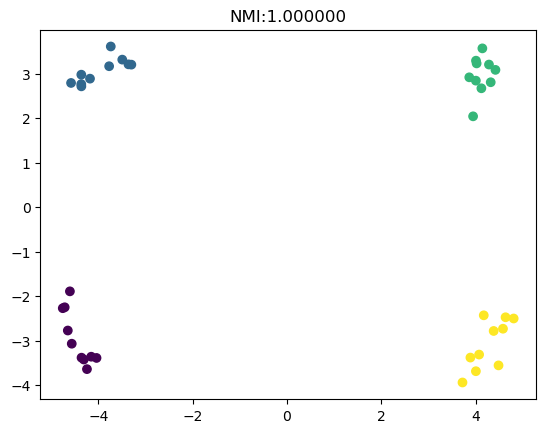

In [1882]:
# We can solve LDA variables from the generalized eigenvalue problem
# S_B@w = lambda*S_W@w

# First variable
L = np.linalg.inv(S_W)@S_B
eigvals, eigvecs = np.linalg.eig(L)
eigvals = np.real(eigvals)
ind = np.argsort(eigvals)[::-1]
eigvals = eigvals[ind]
eigvecs = np.real(eigvecs[:,ind])

H_lda = H@eigvecs[:,:3] # transform data to LDA space
# transform centroids to LDA space
M_lda = M@eigvecs[:,:3]
# classify data
y_pred = np.argmax(H_lda@M_lda.T, axis=1) 
plt.scatter(H_lda[:,0],H_lda[:,1], c=y_pred)
plt.title('NMI:%f' % NMI(y_pred, labels))
plt.show()

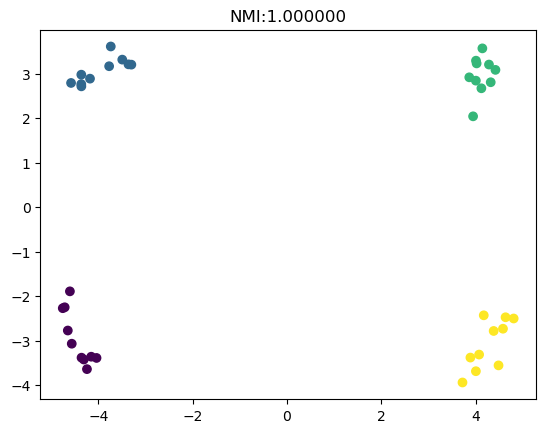

In [1883]:
# We can solve LDA variables from an alternative generalized eigenvalue problem
# (S_T - S_B)@w = lambda*S_B@w (original) with major eigenvectors
# (S_T - S_B)@w = lambda*S_T@w (alternative) with minor eigenvectors
# 

# First variable
L = np.eye(S_T.shape[0]) - np.linalg.inv(S_T)@S_B
#L = np.linalg.inv(S_T)@S_B
eigvals, eigvecs = np.linalg.eig(L)
eigvals = np.real(eigvals)
ind = np.argsort(eigvals)#[::-1]
eigvals = eigvals[ind]
eigvecs = np.real(eigvecs[:,ind])

H_lda = H@eigvecs[:,:3] # transform data to LDA space
# transform centroids to LDA space
M_lda = M@eigvecs[:,:3]
# classify data
y_pred = np.argmax(H_lda@M_lda.T, axis=1) 
plt.scatter(H_lda[:,0],H_lda[:,1], c=y_pred)
plt.title('NMI:%f' % NMI(y_pred, labels))
plt.show()

In [9]:
# Import the necessary modules for kernels, laplacian and spectral clustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neighbors import kneighbors_graph
# import train_test_split function
from sklearn.model_selection import train_test_split
from scipy.linalg import eigh

In [28]:
spirals = pd.read_csv("spirals.csv",sep=',')
print("number of points: %d" % spirals.shape[0])
print("number of features: %d" % (spirals.shape[1]-1))
print("number of classes: %d" % len(np.unique(spirals['class'])))
X = spirals.iloc[:,0:2].to_numpy(dtype=float)
labels = spirals.iloc[:,2].to_numpy(dtype=int)

number of points: 312
number of features: 2
number of classes: 3


In [2411]:
balls = pd.read_csv("../../../random_datasets/balls.csv",sep=',')
print("number of points: %d" % balls.shape[0])
print("number of features: %d" % (balls.shape[1]-1))
print("number of classes: %d" % len(np.unique(balls['class'])))
X = balls.iloc[:,0:2].to_numpy(dtype=float)
labels = balls.iloc[:,2].to_numpy(dtype=int)

number of points: 399
number of features: 2
number of classes: 3


In [12]:
from scipy.cluster.vq import vq
def nn(X, Y, k):
    """
    Computes the k nearest neighbors of each point in X
    """
    dist = pairwise_distances(X, Y)
    ind = np.argsort(dist, axis=1)
    return ind[:,:k]

def noisy_nnvq(X, k, delta=None, repeat=0, return_quantized=False):
    """
    Computes the k nearest neighbors of each point in X
    
    y is optional and refers to the labels of the points in X
    New y is assigned by majority vote. Y is assumed dummy coded
    """
    if delta is None:
        delta = np.std(X, axis=0)/X.shape[0]
        
    NN = nn(X, X + delta*np.random.normal(0,1,X.shape), k)
    # calculate the centroids of the clusters
    centroids = np.zeros((X.shape[0], X.shape[1]))
    for i in range(X.shape[0]):
        centroids[i,:] = np.mean(X[NN[i,:],:], axis=0)
    
    if repeat > 0:
        return noisy_nnvq(centroids, k, delta, repeat-1)
        #return noisy_nnvq(X_vq, k, delta, assignments, repeat-1)
    if return_quantized:
        # assign each point to the closest centroid
        inds = vq(X, centroids)[0]
        # represent each point by the centroid of its cluster
        centroids = centroids[inds,:]
    else:
        centroids, inds = np.unique(centroids,axis=0, return_inverse=True)
    
    return centroids, inds
    
    
def _kmeans(X, centroids, n_iter = 100, tol=1e-3, replace_delta = None):
    """
    K-means algorithm
    """
    drop = (replace_delta is None)
    # initialize centroids
    #centroids = np.random.choice(X.shape[0], size=k, replace=False)
    #centroids = X[centroids,:]
    # initialize labels
    labels = np.zeros(X.shape[0])
    # initialize distances
    dist = np.zeros((X.shape[0], centroids.shape[0]))
    # iterate
    for i in range(n_iter):
        # calculate distances
        for j in range(centroids.shape[0]):
            dist[:,j] = np.linalg.norm(X - centroids[j,:], axis=1)
        # assign labels
        labels = np.argmin(dist, axis=1)
        # calculate new centroids
        centroids_new = np.zeros(centroids.shape)
        n_clusters = 0
        for j in range(centroids.shape[0]):
            if len(labels[labels==j]) > 0 and drop:
                centroids_new[n_clusters,:] = np.mean(X[labels==j,:], axis=0)
                n_clusters += 1
            elif len(labels[labels==j]) > 0 and not drop:
                centroids_new[j,:] = np.mean(X[labels==j,:], axis=0)
            elif len(labels[labels==j]) == 0 and not drop:
                centroids_new[j,:] = centroids[j,:] + replace_delta*np.random.normal(0,1,X.shape[1])
            else:
                continue
        # update centroids
        if drop:
            centroids = centroids_new[:n_clusters,:]
        else:
           centroids = centroids_new
    return centroids, labels    

def noise_initialized_kmeans_vq(X, k, noise_delta=None, replace_delta = None, repeat=0):
    """
    Computes kmeans using noise initialized nearest neighbours as initial centroids
    """
    centroids, _ = noisy_nnvq(X, k, delta=noise_delta, repeat=repeat, return_quantized=False)
    centroids, labels = _kmeans(X, centroids, replace_delta=replace_delta)
    return centroids, labels

def labels_vq(labels, indices):
    """
    Returns the labels of the quantized points
    """
    # if labels are dummy coded
    if len(labels.shape) == 1:
        labels = pd.get_dummies(labels).to_numpy(dtype=float)
    return np.argmax(pd.get_dummies(indices).to_numpy(dtype=float).T@labels, axis=1)
        

def within_and_between_distances(X,y):
    """
    Computes the within and between class distances of a dataset X with labels y
    """
    N = X.shape[0]
    H = X - np.mean(X, axis=0)
    Y=pd.get_dummies(y).to_numpy(dtype=float)
    # calculate all pairwise distances between points
    dist = pairwise_distances(X)
    # calculate within-class distances
    D_W = -np.ones((N,N))
    for i in range(N):
        for j in range(N):
            if y[i] == y[j]:
                D_W[i,j] = dist[i,j]
    # calculate between-class distances
    D_B = np.ones((N,N))
    for i in range(N):
        for j in range(N):
            if y[i] != y[j]:
                D_B[i,j] = dist[i,j]
    # remove all -1 values and get the upper triangular parts
    D_W = D_W[np.triu_indices(N,1)]
    D_B = D_B[np.triu_indices(N,1)]
    D_W = D_W[D_W!=-1]
    D_B = D_B[D_B!=1]
    
    return D_W, D_B
    

In [139]:
X_quant.shape

(201, 2)

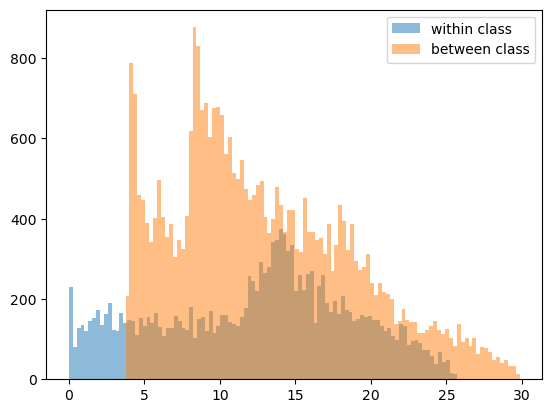

number of clusters: 312
min between: 3.749167


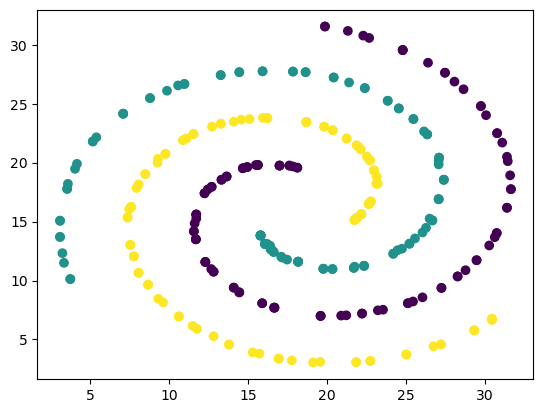

In [181]:
X_quant, inds = noisy_nnvq(X, 2, delta=1, repeat=0, return_quantized=True)
labels_quant = labels
#X_quant, inds = noise_initialized_kmeans_vq(X, 2, noise_delta=0.1, replace_delta = 0.1,  repeat=10)
#labels_quant = labels_vq(labels, inds) #np.argmax(pd.get_dummies(inds).to_numpy(dtype=float).T @ pd.get_dummies(labels).to_numpy(dtype=float), axis=1)
d_w, d_b = within_and_between_distances(X_quant, labels_quant)
plt.hist(d_w, bins=100, alpha=0.5, label='within class')
plt.hist(d_b, bins=100, alpha=0.5, label='between class')
plt.legend()
plt.show()
print("number of clusters: %d" % X_quant.shape[0])
plt.scatter(X_quant[:,0], X_quant[:,1], c=labels_quant)
min_between = np.min([np.min(d_b), np.max(d_w)])
print("min between: %f" % min_between)

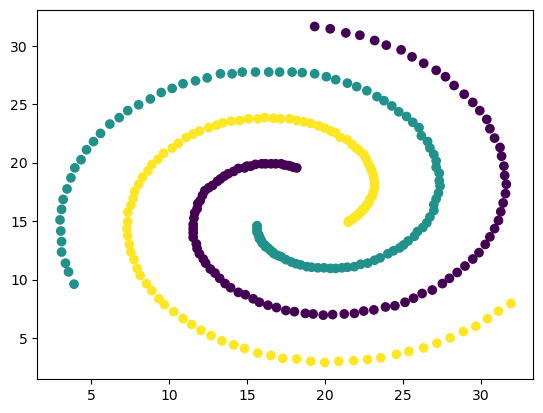

In [30]:
plt.scatter(X[:,0],X[:,1], c=labels)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_quant, labels_quant, test_size=0.1)#, random_state=42)
gamma = 1.5*1/2*np.log(100) / min_between
K = rbf_kernel(X_train, gamma=gamma)
D = np.diag(np.sum(K, axis=1))
D_inv = np.diag(1/np.sum(K, axis=1))
N = K.shape[0]
print(gamma)

0.9212387796781292


In [183]:
L_un = D - K
L_rw = D_inv@L_un
L_sym = np.sqrt(D_inv)@L_un@np.sqrt(D_inv)

In [2424]:
 # centered kernel matrix as laplacian
L_un = K
L_rw = D_inv@L_un
L_sym = np.sqrt(D_inv)@L_un@ np.sqrt(D_inv)

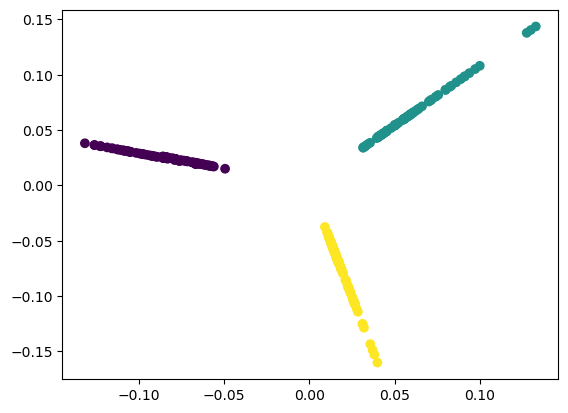

In [184]:
L=L_sym
eigvals, eigvecs = np.linalg.eig(L)
ind = np.argsort(eigvals)#[::-1] # for kernel matrix as laplacian
eigvals = np.real(eigvals[ind])
eigvecs = np.real(eigvecs[:,ind])
eigvecs = eigvecs / np.linalg.norm(eigvecs, axis=1, keepdims=True) # normalize embedded observations if symmetric laplacian

k=1
kk=2
plt.scatter(eigvecs[:,k],eigvecs[:,kk], c=y_train)

In [185]:
L = L_sym
n_comps = 3
eigvals, eigvecs = np.linalg.eig(L)
ind = np.argsort(eigvals)#[::-1] # for kernel matrix as laplacian
eigvals = np.real(eigvals[ind])
eigvecs = np.real(eigvecs[:,ind])
#eigvecs = eigvecs / (eigvecs**2).sum(1) # normalize embedded observations if symmetric laplacian

K_test = rbf_kernel(X_test, X_train, gamma=gamma)
D_test_inv = np.diag(1/np.sum(K_test, axis=1))
L_test = D_test_inv@K_test # OPTION 1
#L_test = D_test_inv**.5@ K_test @D_inv**.5 # OPTION 2 for symmetric laplacian
beta = eigvecs[:,1:n_comps + 1] # alt 1
beta = np.linalg.inv(L.T@L + 0.01*np.eye(L.shape[0]))@L.T@beta # alt 2
#beta = beta / np.linalg.norm(beta, axis=0, keepdims=True) # normalize beta
#beta1 = regularize(L, eigvecs[:,1].reshape(-1,1), 0.1, normalize=True)
#beta2 = regularize(L, eigvecs[:,2].reshape(-1,1), 0.1, normalize=True)
#beta3 = regularize(L, eigvecs[:,3].reshape(-1,1), 0.1, normalize=True)
#beta = np.hstack((beta1, beta2, beta3))
#beta = regularize(L, eigvecs[:,1:n_comps+1], .1, normalize=True)
#beta = it_regularize(L, eigvecs[:,1:n_comps+1], .5, 1, normalize=True)

_transform = lambda kernel: np.diag(1./np.sum(kernel, axis=1))@kernel@beta
transform = lambda x, g: _transform(rbf_kernel(x, X_train, gamma=g))

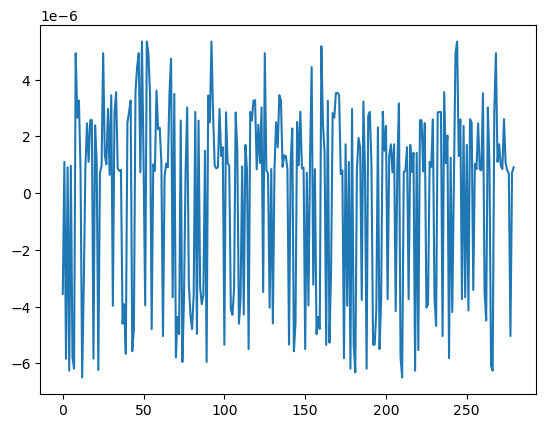

In [186]:
plt.plot(beta[:,0])

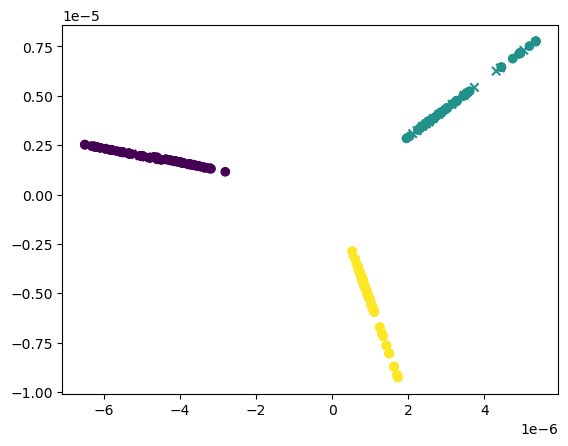

1.0

In [187]:
# plot 2d scatterplot of first 2 components
k=0
kk=1
embeds_hat = transform(X_test, gamma)
plt.scatter(beta[:,k], beta[:,kk], c=y_train)
plt.scatter(embeds_hat[:,k], embeds_hat[:,kk], c=y_test, marker='x') # c='k'
#plt.scatter(L_test@beta[:,k], L_test@beta[:,kk], c=y_test, marker='x') # c='k'

# add quiver plot for mean vectors (each row in means corresponds to a class -- plot arrow for each class)
if 0:
    Y_dummy_train = pd.get_dummies(y_train).to_numpy(dtype=float)
    means = np.linalg.inv(Y_dummy_train.T@Y_dummy_train)@Y_dummy_train.T@beta#eigvecs[:,:3]
    for i in range(means.shape[0]):
        plt.quiver([0],[0],means[i,k], means[i,kk], scale=1, scale_units='xy', angles='xy')

plt.show()

# run nn classification on embedded data
neigh = KNeighborsClassifier(n_neighbors=20, metric = 'cosine').fit(beta, y_train)
y_pred = neigh.predict(L_test@beta)
NMI(y_pred, y_test)
# plot 3d scatterplot of first 3 components
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(L_sym@eigvecs[:,0], L_sym@eigvecs[:,1], L_sym@eigvecs[:,2], c=labels)

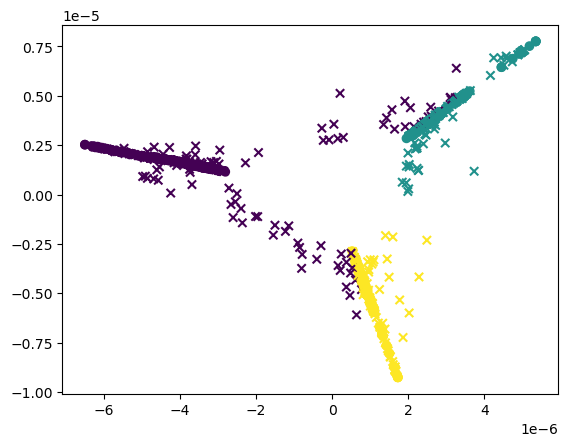

In [188]:
# generate 2d grid of points on which to evaluate the embedding (0,35)
mesh = np.meshgrid(np.linspace(0,35,35), np.linspace(0,35,35))
#mesh = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))
embeds_hat = transform(np.vstack((mesh[0].flatten(), mesh[1].flatten())).T, 1)
ypred = neigh.predict(embeds_hat)
# plot the embedding
plt.scatter(beta[:,0], beta[:,1], c=y_train)
plt.scatter(embeds_hat[:,0], embeds_hat[:,1], c=ypred, marker='x') # c='k'

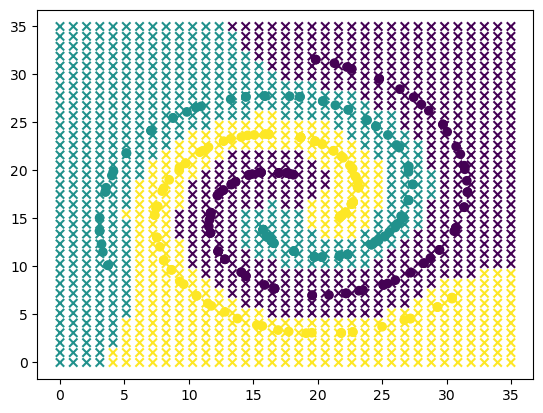

In [189]:
# plot the mesh in input space with the predicted labels and training data
plt.scatter(mesh[0].flatten(), mesh[1].flatten(), c=ypred, marker='x') # c='k'
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [ ]:
class SpectralMap():
    def __init__(self, n_components, kernel='rbf', laplacian='unnormalized', gamma=None, k=None):
        self.n_components = n_components
        self.k = k
        self.gamma = gamma
        self.kernel = kernel
        self.laplacian = laplacian
        self.fitted = False
        
    def fit(self, X):
        self.X = X
        self.N = X.shape[0]
        self.K = self._get_weight_matrix(X)
        self.L = self._get_laplacian_matrix(self.K)
        self.eigvals, self.eigvecs = self._get_eigenvalues(self.L)
        self.H = self._get_H(self.eigvecs)
        self.labels = self._get_labels(self.H)
        self.fitted = True
        return self
    
    def _get_weight_matrix(self, X, y=None):
        if self.kernel == 'rbf':
            return rbf_kernel(X, y, gamma=self.gamma)
        else:
            pass
    
    def _get_degree_matrix(self, W):
        return np.diag(np.sum(W, axis=1))
    
    def _get_inverse_degree_matrix(self, W, root=False):
        if root:
            return np.diag(1/np.sqrt(np.sum(W, axis=1)))
        else:
            return np.diag(1/np.sum(W, axis=1))
        
    def _get_laplacian_matrix(self, W):
        if self.laplacian == 'unnormalized':
            return self._get_degree_matrix(W) - W
        elif self.laplacian == 'normalized':
            return np.eye(self.N) - self._get_inverse_degree_matrix(W)@W
        elif self.laplacian == 'symmetric':
            return np.eye(self.N) - self._get_inverse_degree_matrix(W, root=True)@W@self._get_inverse_degree_matrix(W, root=True)
        else:
            raise ValueError("Laplacian must be 'unnormalized' or 'normalized'")
            
    def _get_eigenvalues(self, L):
        eigvals, eigvecs = np.linalg.eig(L)
        eigvals = np.real(eigvals)
        ind = np.argsort(eigvals)
        eigvals = eigvals[ind]
        eigvecs = np.real(eigvecs[:,ind])
        return eigvals, eigvecs
    
    def _get_H(self, eigvecs):
        return eigvecs[:,:self.n_components]
    
    def embed(self, X):
        if self.fitted:
            return self._get_H(self._get_weight_matrix(X, self.X)@self.eigvecs)
        else:
            raise ValueError("Model must be fitted first")
    

In [1291]:
def regularize(Laplacian, B, p=1, normalize=True, axis=1):
    assert p>=0 and p<=1, "p must be between 0 and 1"
    
    n = int(Laplacian.shape[0]*p)
    inds = np.random.choice(np.arange(Laplacian.shape[0]), n, replace=False)
    # regress B on L, with one column of L zeroed out
    # and average the coefficients
    #coeffs = np.linalg.inv(Laplacian.T@Laplacian)@Laplacian.T@B
    coeffs = B.copy()
    for ind in inds:
        L_temp = Laplacian.copy()
        L_temp[ind,:] = 0
        coeffs += np.linalg.inv(L_temp.T@L_temp)@L_temp.T@B
    # normalize coefficients
    if normalize:
        coeffs = coeffs / np.linalg.norm(coeffs, axis=axis, keepdims=True)
    return coeffs

def it_regularize(Laplacian, B, p, it, normalize=True, axis=1):
    assert p>0 and p<1, "p must be between 0 and 1"
    coeffs = B.copy()
    for i in range(it):
        coeffs += regularize(Laplacian, B, p, normalize, axis)
    # normalize coefficients
    if normalize:
        coeffs = coeffs / np.linalg.norm(coeffs, axis=axis, keepdims=True)
    return coeffs



From https://alexhwilliams.info/itsneuronalblog/2018/02/26/crossval/

In [2282]:
def censored_lstsq(X, Y, M):
    """Least squares of M * (X*beta - Y) over beta, where M is a masking matrix.
    """
    rhs = np.dot(X.T, M * Y).T[:,:,None] # n x r x 1 tensor
    T = np.matmul(X.T[None,:,:], M.T[:,:,None] * X[None,:,:] + 1e-6*np.eye(X.shape[1]))
    return np.linalg.solve(T, rhs).reshape(X.shape[1], Y.shape[1])

def cv_pca(data, rank, p_holdout=.1, n_iter=100):
    """Fit PCA while holding out a fraction of the dataset.
    """
    # create masking matrix
    M = np.random.rand(data.shape) < p_holdout

    # fit pca
    U = np.random.randn(data.shape[0], rank)
    for itr in range(n_iter):
        Vt = censored_lstsq(U, data, M)
        U = censored_lstsq(Vt.T, data.T, M.T).T

    # orthogonalize U and Vt and then rotate to align
    # with directions of maximal variance
    
    
    # return result and test/train error
    resid = np.dot(U, Vt) - data
    train_err = np.mean(resid[M]**2)
    test_err = np.mean(resid[~M]**2)
    return train_err, test_err



Implement SPCA using pytorch